In [1]:
import unittest
import sys
import numpy as np
from importlib import reload
from scipy.misc import imread
from scipy.spatial import distance
from scipy.stats import multivariate_normal
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def run_tests(test_module):
    suite = unittest.TestLoader().loadTestsFromTestCase(test_module)
    unittest.TextTestRunner(verbosity=1,stream=sys.stderr).run(suite)

In [3]:
from task2 import MatrixFromVectors
from test_task2 import TestMatrixFromVectors
reload(sys.modules['task2'])
reload(sys.modules['test_task2'])

<module 'test_task2' from '/home/dasha/task1/test_task2.py'>

In [4]:
run_tests(TestMatrixFromVectors)

..........
----------------------------------------------------------------------
Ran 10 tests in 0.008s

OK


In [19]:
# Для построения графиков
alg_plt = {}

In [20]:
X = np.random.rand(10000, 5000)
i = np.array(1000)
j = np.array(1000)
matrix_from_vectors = MatrixFromVectors()
x = %timeit -o -n 100000 matrix_from_vectors.vect_version_hstack(X, i, j) 
y = %timeit -o -n 100000 matrix_from_vectors.vect_version_transpose(X, i, j)
z = %timeit -o -n 100000 matrix_from_vectors.vect_version_concat(X, i, j)
g = %timeit -o -n 100000 matrix_from_vectors.non_vect_version(X, i, j)
f = %timeit -o -n 100000 matrix_from_vectors.fast_version(X, i, j)

100000 loops, best of 3: 589 ns per loop
100000 loops, best of 3: 591 ns per loop
100000 loops, best of 3: 585 ns per loop
100000 loops, best of 3: 639 ns per loop
100000 loops, best of 3: 383 ns per loop


In [21]:
alg_plt[X.size] = [x.best, y.best, z.best, g.best, f.best]

In [22]:
X = np.random.rand(100, 50)
i = np.array(10)
j = np.array(10)
matrix_from_vectors = MatrixFromVectors()
x = %timeit -o -n 100000 matrix_from_vectors.vect_version_hstack(X, i, j) 
y = %timeit -o -n 100000 matrix_from_vectors.vect_version_transpose(X, i, j)
z = %timeit -o -n 100000 matrix_from_vectors.vect_version_concat(X, i, j)
g = %timeit -o -n 100000 matrix_from_vectors.non_vect_version(X, i, j)
f = %timeit -o -n 100000 matrix_from_vectors.fast_version(X, i, j)

100000 loops, best of 3: 558 ns per loop
100000 loops, best of 3: 553 ns per loop
100000 loops, best of 3: 554 ns per loop
100000 loops, best of 3: 596 ns per loop
100000 loops, best of 3: 350 ns per loop


In [23]:
alg_plt[X.size] = [x.best, y.best, z.best, g.best, f.best]

In [24]:
X = np.random.rand(4, 3)
i = np.array(1)
j = np.array(1)
matrix_from_vectors = MatrixFromVectors()
x = %timeit -o -n 100000 matrix_from_vectors.vect_version_hstack(X, i, j) 
y = %timeit -o -n 100000 matrix_from_vectors.vect_version_transpose(X, i, j)
z = %timeit -o -n 100000 matrix_from_vectors.vect_version_concat(X, i, j)
g = %timeit -o -n 100000 matrix_from_vectors.non_vect_version(X, i, j)
f = %timeit -o -n 100000 matrix_from_vectors.fast_version(X, i, j)

100000 loops, best of 3: 556 ns per loop
100000 loops, best of 3: 551 ns per loop
100000 loops, best of 3: 547 ns per loop
100000 loops, best of 3: 598 ns per loop
100000 loops, best of 3: 351 ns per loop


In [25]:
alg_plt[X.size] = [x.best, y.best, z.best, g.best, f.best]

/home/dasha/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


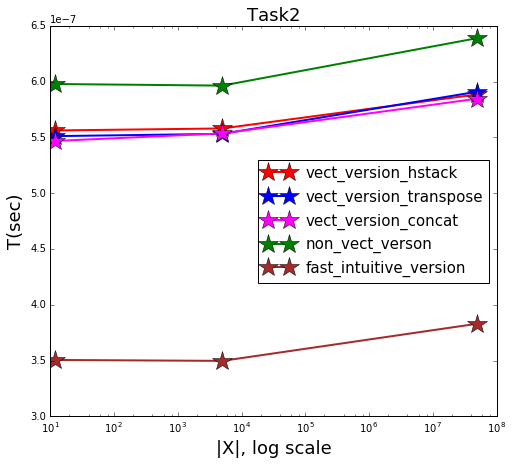

In [26]:
plt.figure(figsize=(8,7))
plt.gca().set_color_cycle(['red','blue', 'magenta', 'green', 'brown'])
X_sizes = sorted(alg_plt.keys())
for i in range(len(X_sizes)+2):
    tmp = []
    for key, value in sorted(alg_plt.items()):
        tmp.append(alg_plt[key][i])
    plt.plot(X_sizes, tmp,  lw = 2, marker='*', markersize=20)
plt.xscale('log')
plt.title('Task2', fontsize = 18)
plt.legend(['vect_version_hstack', 'vect_version_transpose', 'vect_version_concat',
            'non_vect_verson', 'fast_intuitive_version'],
           loc = 'best', fontsize = 15)
plt.ylabel('T(sec)', fontsize = 18)
plt.xlabel('|X|, log scale', fontsize = 18)
plt.savefig('task2.eps',  format = 'eps')
plt.show()

---------

In [3]:
from task3 import MultiSet
from test_task3 import TestMultiSet
reload(sys.modules['task3'])
reload(sys.modules['test_task3'])

<module 'test_task3' from '/home/dasha/task1/test_task3.py'>

In [4]:
run_tests(TestMultiSet)

......
----------------------------------------------------------------------
Ran 6 tests in 0.005s

OK


In [16]:
# Для построения графиков
alg_plt = {}

In [17]:
# Большие векторы, так что циклов возьмем поменьше
x = np.random.rand(10000)
y = np.random.rand(10000)
multiset = MultiSet()
a = %timeit -o -n 100 multiset.vect_version(x, y) 
b = %timeit -o -n 100 multiset.another_vect_version(x, y)
c = %timeit -o -n 100 multiset.non_vect_version(x, y)

100 loops, best of 3: 1.29 ms per loop
100 loops, best of 3: 1.4 ms per loop
100 loops, best of 3: 3.06 ms per loop


In [18]:
alg_plt[x.size] = [a.best, b.best, c.best]

In [19]:
x = np.random.rand(1000)
y = np.random.rand(5000)
multiset = MultiSet()
a = %timeit -o -n 100 multiset.vect_version(x, y) 
b = %timeit -o -n 100 multiset.another_vect_version(x, y)
c = %timeit -o -n 100 multiset.non_vect_version(x, y)

100 loops, best of 3: 368 µs per loop
100 loops, best of 3: 425 µs per loop
100 loops, best of 3: 907 µs per loop


In [20]:
alg_plt[x.size] = [a.best, b.best, c.best]

In [21]:
x = np.random.rand(10)
y = np.random.rand(20)
multiset = MultiSet()
a = %timeit -o -n 100 multiset.vect_version(x, y) 
b = %timeit -o -n 100 multiset.another_vect_version(x, y)
c = %timeit -o -n 100 multiset.non_vect_version(x, y)

100 loops, best of 3: 38.2 µs per loop
100 loops, best of 3: 77.4 µs per loop
100 loops, best of 3: 15.9 µs per loop


In [22]:
alg_plt[x.size] = [a.best, b.best, c.best]

/home/dasha/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


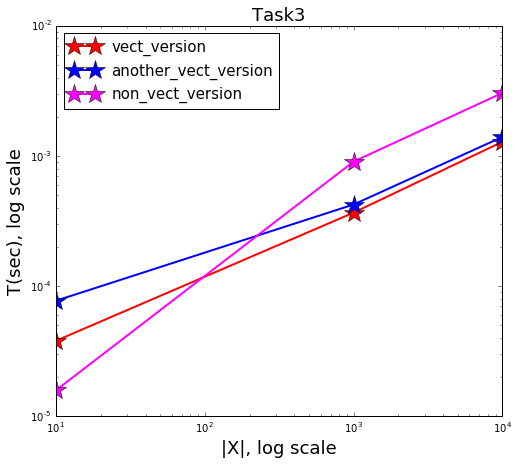

In [23]:
plt.figure(figsize=(8,7))
plt.gca().set_color_cycle(['red','blue', 'magenta'])
X_sizes = sorted(alg_plt.keys())
for i in range(len(X_sizes)):
    tmp = []
    for key, value in sorted(alg_plt.items()):
        tmp.append(alg_plt[key][i])
    plt.plot(X_sizes, tmp,  lw = 2, marker='*', markersize=20)
plt.title('Task3', fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.legend(['vect_version', 'another_vect_version', 'non_vect_version'],
           loc = 'best', fontsize = 15)

plt.ylabel('T(sec), log scale', fontsize = 18)
plt.xlabel('|X|, log scale', fontsize = 18)
plt.savefig('task3.eps', format = 'eps')
plt.show()

---

In [3]:
from task4 import MaxAfterZero
from test_task4 import TestMaxAfterZero
reload(sys.modules['task4'])
reload(sys.modules['test_task4'])

<module 'test_task4' from '/home/dasha/task1/test_task4.py'>

In [39]:
run_tests(TestMaxAfterZero)

......
----------------------------------------------------------------------
Ran 6 tests in 0.018s

OK


In [4]:
# Для построения графиков
alg_plt = {}

In [5]:
x = np.random.rand(10000)
# обеспечим присутствие нулей
for i in range(0, 100, 10):
    x[i] = 0
max_after_zero = MaxAfterZero()
a = %timeit -o -n 10000 max_after_zero.vect_version(x) 
b = %timeit -o -n 10000 max_after_zero.smart_version(x)
c = %timeit -o -n 10000 max_after_zero.non_vect_version(x)

10000 loops, best of 3: 51 µs per loop
10000 loops, best of 3: 3.79 ms per loop
10000 loops, best of 3: 2.38 ms per loop


In [6]:
alg_plt[x.size] = [a.best, b.best, c.best]

In [7]:
x = np.random.rand(1000)
# обеспечим присутствие нулей
for i in range(0, 100, 10):
    x[i] = 0
max_after_zero = MaxAfterZero()
a = %timeit -o -n 10000 max_after_zero.vect_version(x) 
b = %timeit -o -n 10000 max_after_zero.smart_version(x)
c = %timeit -o -n 10000 max_after_zero.non_vect_version(x)

10000 loops, best of 3: 13.7 µs per loop
10000 loops, best of 3: 377 µs per loop
10000 loops, best of 3: 241 µs per loop


In [8]:
alg_plt[x.size] = [a.best, b.best, c.best]

In [9]:
x = np.random.rand(10)
# обеспечим присутствие нулей
for i in range(0, 5, 2):
    x[i] = 0
max_after_zero = MaxAfterZero()
a = %timeit -o -n 10000 max_after_zero.vect_version(x) 
b = %timeit -o -n 10000 max_after_zero.smart_version(x)
c = %timeit -o -n 10000 max_after_zero.non_vect_version(x)

10000 loops, best of 3: 9.58 µs per loop
10000 loops, best of 3: 6.21 µs per loop
10000 loops, best of 3: 4.39 µs per loop


In [10]:
alg_plt[x.size] = [a.best, b.best, c.best]

/home/dasha/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


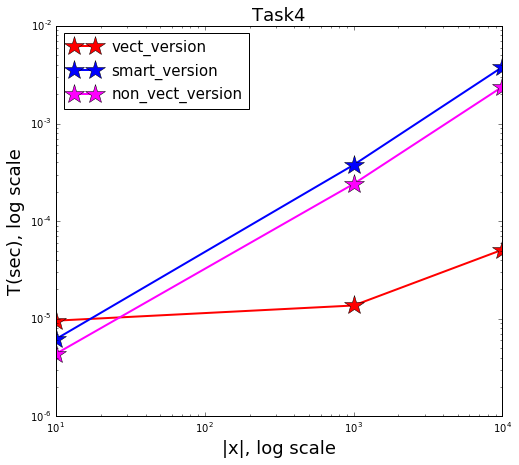

In [12]:
plt.figure(figsize=(8,7))
plt.gca().set_color_cycle(['red','blue', 'magenta'])
X_sizes = sorted(alg_plt.keys())
for i in range(len(X_sizes)):
    tmp = []
    for key, value in sorted(alg_plt.items()):
        tmp.append(alg_plt[key][i])
    plt.plot(X_sizes, tmp,  lw = 2, marker='*', markersize=20)
plt.title('Task4', fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.legend(['vect_version', 'smart_version', 'non_vect_version'],
           loc = 'best', fontsize = 15)

plt.ylabel('T(sec), log scale', fontsize = 18)
plt.xlabel('|x|, log scale', fontsize = 18)
plt.savefig('task4.eps', format = 'eps')
plt.show()

---

In [3]:
from task8 import MultiLogNormDensity
from test_task8 import TestMultiLogNormDensity
reload(sys.modules['task8'])
reload(sys.modules['test_task8'])

<module 'test_task8' from '/home/dasha/task1/test_task8.py'>

In [4]:
run_tests(TestMultiLogNormDensity)

...
----------------------------------------------------------------------
Ran 3 tests in 0.032s

OK


In [5]:
# Для построения графиков
alg_plt = {}

In [6]:
mu = 2*np.random.random_sample((300,)) - 1
Q = 2*np.random.random_sample((300, 300)) - 1
sigma = Q.T.dot(Q)
X = 2*np.random.random_sample((500, 300)) - 1

ml_logpdf = MultiLogNormDensity()
a = %timeit -o -n 5 ml_logpdf.vect_version(X, mu, sigma) 
b = %timeit -o -n 5 ml_logpdf.another_vect_version(X, mu, sigma)
c = %timeit -o -n 5 ml_logpdf.non_vect_version(X, mu, sigma)

5 loops, best of 3: 7.21 ms per loop
5 loops, best of 3: 10.2 ms per loop
5 loops, best of 3: 14.2 s per loop


In [7]:
logpdf = %timeit -o -n 5 multivariate_normal(mu, sigma).logpdf(X)

5 loops, best of 3: 12.3 ms per loop


In [8]:
alg_plt[X.size] = [a.best, b.best, c.best, logpdf.best]

In [9]:
X = np.random.rand(1000, 10)
mu = np.mean(X, axis = 0)
sigma = np.eye(10)
ml_logpdf = MultiLogNormDensity()
a = %timeit -o -n 5 ml_logpdf.vect_version(X, mu, sigma) 
b = %timeit -o -n 5 ml_logpdf.another_vect_version(X, mu, sigma)
c = %timeit -o -n 5 ml_logpdf.non_vect_version(X, mu, sigma)

5 loops, best of 3: 151 µs per loop
5 loops, best of 3: 3.18 ms per loop
5 loops, best of 3: 61.3 ms per loop


In [10]:
logpdf = %timeit -o -n 5 multivariate_normal(mu, sigma).logpdf(X)

5 loops, best of 3: 576 µs per loop


In [11]:
alg_plt[X.size] = [a.best, b.best, c.best, logpdf.best]

In [12]:
X = np.random.rand(100, 5)
mu = np.mean(X, axis = 0)
sigma = np.eye(5)
ml_logpdf = MultiLogNormDensity()
a = %timeit -o -n 5 ml_logpdf.vect_version(X, mu, sigma) 
b = %timeit -o -n 5 ml_logpdf.another_vect_version(X, mu, sigma)
c = %timeit -o -n 5 ml_logpdf.non_vect_version(X, mu, sigma)

5 loops, best of 3: 129 µs per loop
5 loops, best of 3: 102 µs per loop
5 loops, best of 3: 4.05 ms per loop


In [13]:
logpdf = %timeit -o -n 5 multivariate_normal(mu, sigma).logpdf(X)

5 loops, best of 3: 399 µs per loop


In [14]:
alg_plt[X.size] = [a.best, b.best, c.best, logpdf.best]

/home/dasha/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


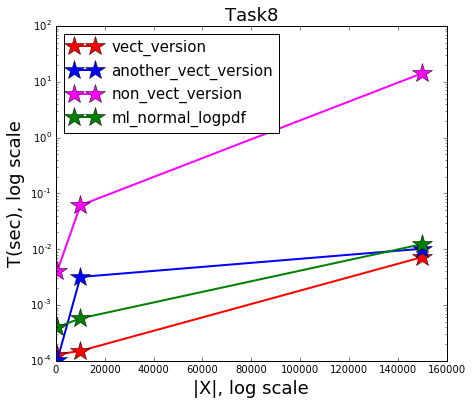

In [16]:
plt.figure(figsize=(7,6))
plt.gca().set_color_cycle(['red','blue', 'magenta', 'green'])
X_sizes = sorted(alg_plt.keys())
for i in range(len(X_sizes)+1):
    tmp = []
    for key, value in sorted(alg_plt.items()):
        tmp.append(alg_plt[key][i])
    plt.plot(X_sizes, tmp,  lw = 2, marker='*', markersize=20)
plt.title('Task8', fontsize = 18)
#plt.xscale('log')
plt.yscale('log')
plt.legend(['vect_version', 'another_vect_version', 'non_vect_version', 'ml_normal_logpdf'],
           loc = 'upper left', fontsize = 15)
plt.ylabel('T(sec), log scale', fontsize = 18)
plt.xlabel('|X|, log scale', fontsize = 18)
plt.savefig('task8.eps', format = 'eps')
plt.show()